In [2]:
import pandas as pd
import matplotlib.pyplot as plt

In [54]:
df = pd.read_csv('mbti.csv', index_col=None)
df

,type,posts
0,INFJ,'http://www.youtube.com/watch?v=qsXHcwe3krw|||...
1,ENTP,'I'm finding the lack of me in these posts ver...
2,INTP,'Good one _____ https://www.youtube.com/wat...
3,INTJ,"'Dear INTP, I enjoyed our conversation the o..."
4,ENTJ,'You're fired.|||That's another silly misconce...
...,...,...
8670,ISFP,'https://www.youtube.com/watch?v=t8edHB_h908||...
8671,ENFP,'So...if this thread already exists someplace ...
8672,INTP,'So many questions when i do these things. I ...
8673,INFP,'I am very conflicted right now when it comes ...


In [23]:
mapping = {
    'I': 'Introversion',
    'E': 'Extroversion',
    'N': 'Intuition',
    'S': 'Sensing',
    'T': 'Thinking',
    'F': 'Feeling',
    'J': 'Judging',
    'P': 'Perceiving',
}

## Sentence Length Distribution

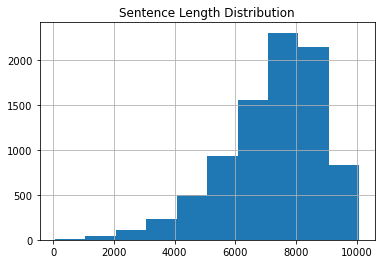

count     8675.000000
mean      7234.989625
std       1607.806938
min         57.000000
25%       6325.000000
50%       7515.000000
75%       8429.000000
max      10090.000000
dtype: float64

In [25]:
# sequence length
posts_len = [len(x) for x in df.posts]
pd.Series(posts_len).hist()
plt.title("Sentence Length Distribution")
plt.show()
pd.Series(posts_len).describe()
# plt.savefig('Sentence_length_distribution.png')

## Class Distribution

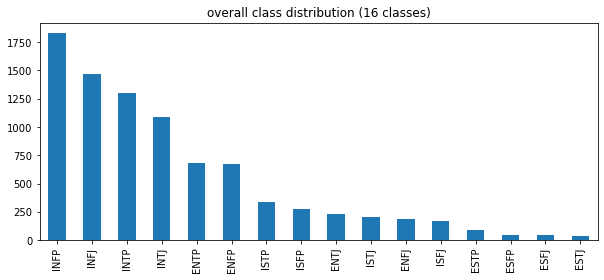

In [26]:
# overall class distribution
%matplotlib inline
plt.figure(figsize=(10,4))
plt.title("overall class distribution (16 classes)")
df["type"].value_counts().plot(kind='bar');
# plt.savefig('overall_class_distribution.png')

In [27]:
# one dimension
df["EI"] = [row["type"][0] for _,row in df.iterrows()]
df["NS"] = [row["type"][1] for _,row in df.iterrows()]
df["FT"] = [row["type"][2] for _,row in df.iterrows()]
df["PJ"] = [row["type"][3] for _,row in df.iterrows()]
# print(df)

/opt/conda/lib/python3.6/site-packages/pandas/plotting/_matplotlib/tools.py:307: MatplotlibDeprecationWarning: 
The rowNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().rowspan.start instead.
  layout[ax.rowNum, ax.colNum] = ax.get_visible()
/opt/conda/lib/python3.6/site-packages/pandas/plotting/_matplotlib/tools.py:307: MatplotlibDeprecationWarning: 
The colNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().colspan.start instead.
  layout[ax.rowNum, ax.colNum] = ax.get_visible()
/opt/conda/lib/python3.6/site-packages/pandas/plotting/_matplotlib/tools.py:313: MatplotlibDeprecationWarning: 
The rowNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().rowspan.start instead.
  if not layout[ax.rowNum + 1, ax.colNum]:
/opt/conda/lib/python3.6/site-packages/pandas/plotting/_matplotlib/tools.py:3

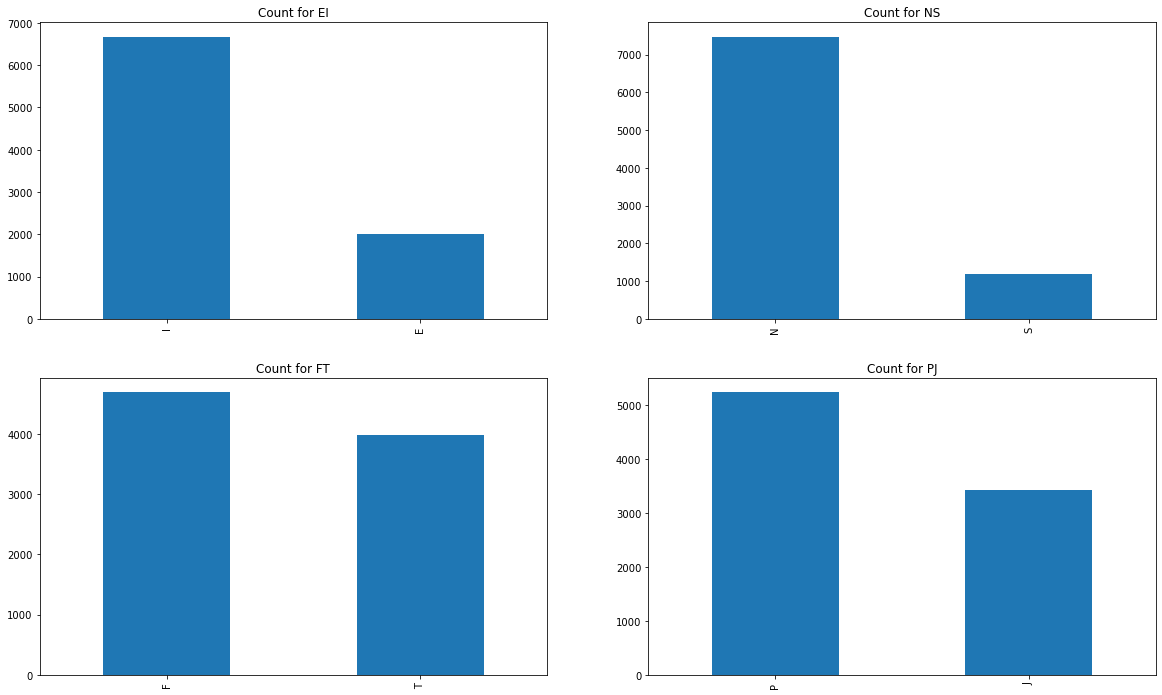

In [28]:
# one diemnsion class distribution
%matplotlib inline

col = 2
row = 2

fig, axes = plt.subplots(row,col, figsize=(20, 12))
df["EI"].value_counts().plot(ax=axes[0, 0],kind='bar').set_title("Count for EI");
df["NS"].value_counts().plot(ax=axes[0, 1],kind='bar').set_title("Count for NS");
df["FT"].value_counts().plot(ax=axes[1, 0],kind='bar').set_title("Count for FT");
df["PJ"].value_counts().plot(ax=axes[1, 1],kind='bar').set_title("Count for PJ");
# plt.savefig('one_diemnsion_class_distribution.png')

In [29]:
# two dimensions (two classes)
df["EI/NS"] = [row["type"][:2] for _,row in df.iterrows()]
df["EI/FT"] = [row["type"][0]+row["type"][2] for _,row in df.iterrows()]
df["EI/PJ"] = [row["type"][0]+row["type"][3] for _,row in df.iterrows()]
df["NS/FT"] = [row["type"][1:3] for _,row in df.iterrows()]
df["NS/PJ"] = [row["type"][1]+row["type"][3] for _,row in df.iterrows()]
df["FT/PJ"] = [row["type"][2:] for _,row in df.iterrows()]
# print(df)

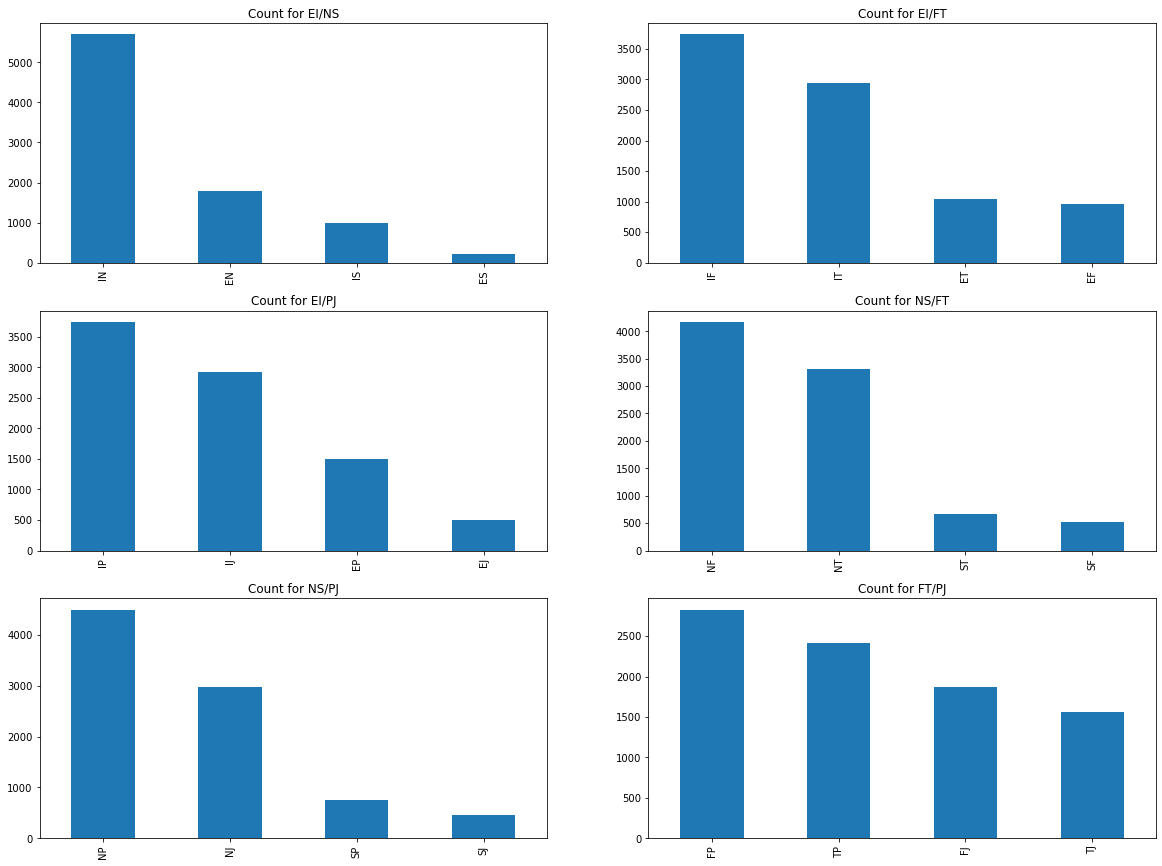

In [9]:
# two diemnsion class distribution (four classes)
%matplotlib inline

col = 2
row = 3

fig, axes = plt.subplots(row,col, figsize=(20, 15))
df["EI/NS"].value_counts().plot(ax=axes[0, 0],kind='bar').set_title("Count for EI/NS");
df["EI/FT"].value_counts().plot(ax=axes[0, 1],kind='bar').set_title("Count for EI/FT");
df["EI/PJ"].value_counts().plot(ax=axes[1, 0],kind='bar').set_title("Count for EI/PJ");
df["NS/FT"].value_counts().plot(ax=axes[1, 1],kind='bar').set_title("Count for NS/FT");
df["NS/PJ"].value_counts().plot(ax=axes[2, 0],kind='bar').set_title("Count for NS/PJ");
df["FT/PJ"].value_counts().plot(ax=axes[2, 1],kind='bar').set_title("Count for FT/PJ");
# plt.savefig('two_diemnsion_class_distribution.png')

In [31]:
# three dimensions
df["EI/NS/FT"] = [row["type"][:2] for _,row in df.iterrows()]
df["EI/NS/PJ"] = [row["type"][:2] for _,row in df.iterrows()]
df["EI/FT/PJ"] = [row["type"][:2] for _,row in df.iterrows()]
df["NS/FT/PJ"] = [row["type"][:2] for _,row in df.iterrows()]
# print(df)

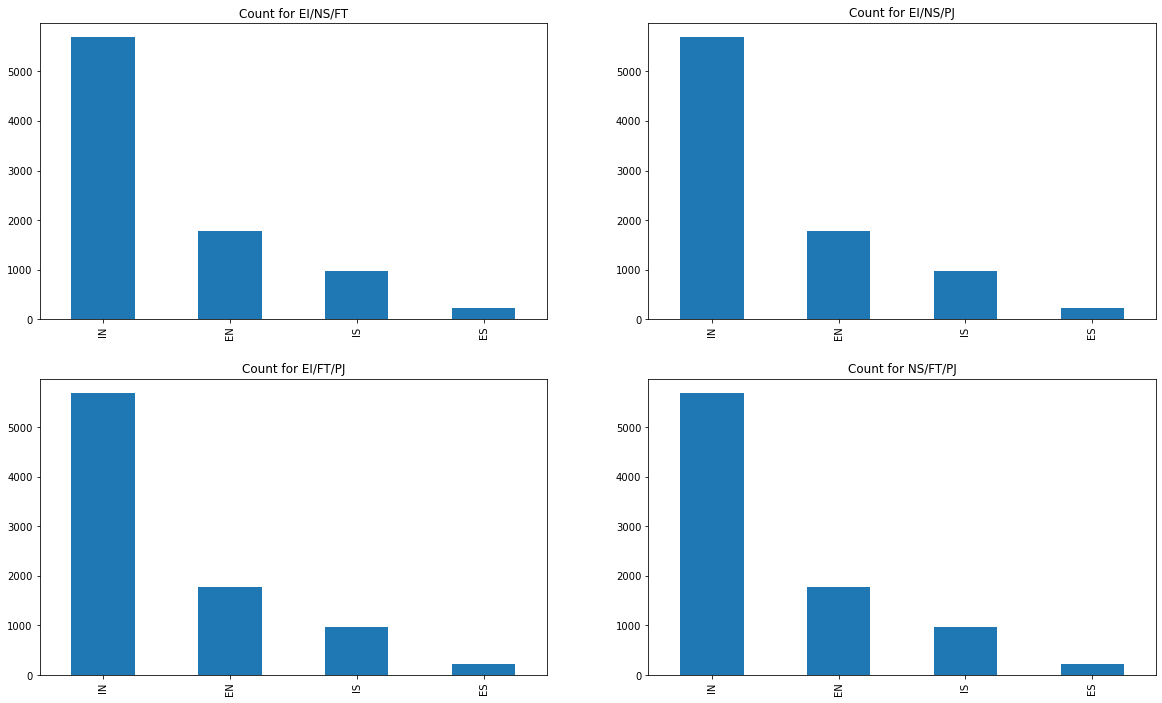

In [32]:
# three diemnsion class distribution
%matplotlib inline

col = 2
row = 2

fig, axes = plt.subplots(row,col, figsize=(20, 12))
df["EI/NS/FT"].value_counts().plot(ax=axes[0, 0],kind='bar').set_title("Count for EI/NS/FT");
df["EI/NS/PJ"].value_counts().plot(ax=axes[0, 1],kind='bar').set_title("Count for EI/NS/PJ");
df["EI/FT/PJ"].value_counts().plot(ax=axes[1, 0],kind='bar').set_title("Count for EI/FT/PJ");
df["NS/FT/PJ"].value_counts().plot(ax=axes[1, 1],kind='bar').set_title("Count for NS/FT/PJ");
# plt.savefig('three_diemnsion_class_distribution.png')

## Word Cloud

In [14]:
!pip install wordcloud

  Using cached wordcloud-1.8.1-cp36-cp36m-manylinux1_x86_64.whl (366 kB)


In [56]:
import re

def replace_symbols(text):
    text = re.sub('\|\|\|', ' ', text)
    text = re.sub('https?\S+', '<URL>', text)
    return text

df['cleaned_posts'] = df['posts'].apply(replace_symbols)

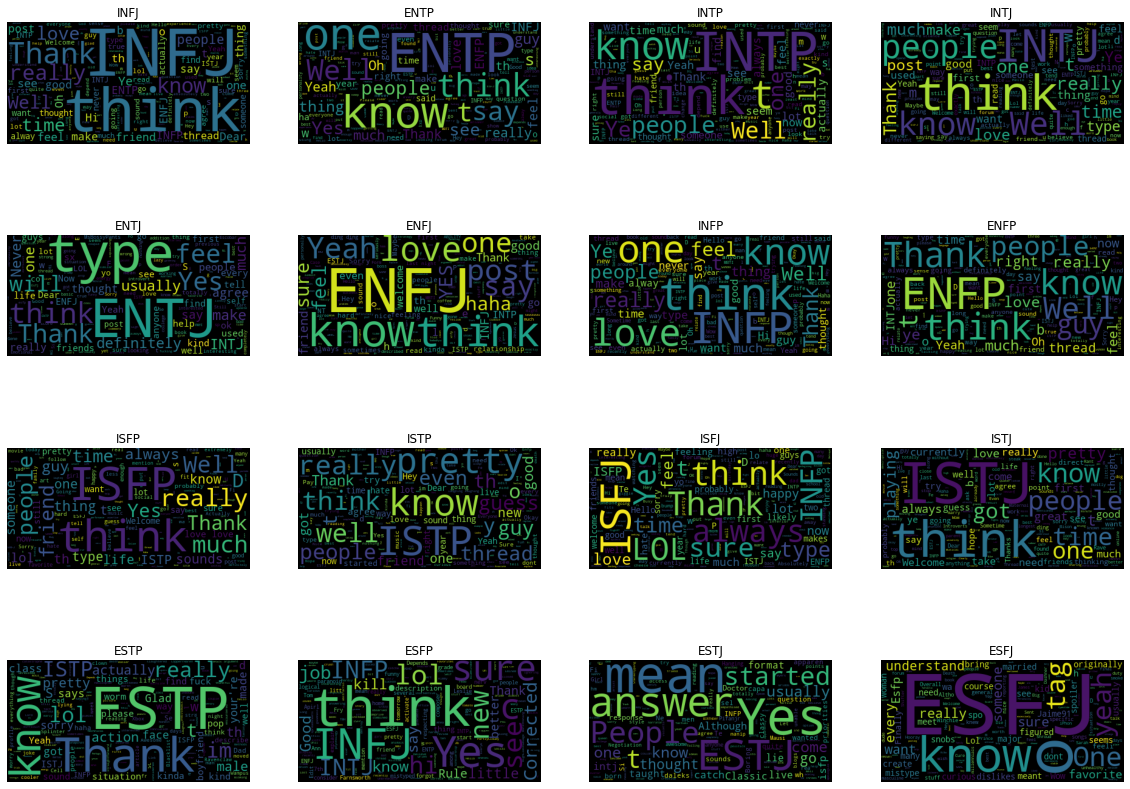

In [63]:
from wordcloud import WordCloud, STOPWORDS

STOPWORDS.add('URL') # words to not consider
labels = df['type'].unique()
row, col = 4, 4
wc = WordCloud(stopwords=STOPWORDS)

fig, ax = plt.subplots(4, 4, figsize=(20,15))

for i in range(4):
    for j in range(4):
        cur_type = labels[i*col+j]
        cur_ax = ax[i][j]
        dff = df[df['type'] == cur_type]
        wordcloud = wc.generate(dff['cleaned_posts'].to_string())
        cur_ax.imshow(wordcloud)
        cur_ax.axis('off')
        cur_ax.set_title(cur_type)
# plt.savefig('word_cloud.png')

Based on the plots, two classes(FT) and four classes(FT/PJ) have relatively balanced data.

In [13]:
df1 = df[["FT","lemmatized"]]
# df1.to_csv("mbti_rm_stop_lemmatized_ft.csv",index=False)

In [14]:
df2 = df[["FT/PJ","lemmatized"]]
# df2.to_csv("mbti_rm_stop_lemmatized_ftpj.csv",index=False)

In [15]:
df3 = df[["EI/NS","FT/PJ","lemmatized"]]
df3.to_csv("mbti_rm_stop_lemmatized_ftpj_eins.csv",index=False)

In [16]:
a = df["type"].value_counts()[:6].index.tolist()
df4 = df.loc[df['type'].isin(a)]
df4 = df4[["type","lemmatized"]]
# df4.to_csv("mbti_rm_stop_lemmatized_top6.csv",index=False)